In [228]:
import xarray
import matplotlib.pyplot as mp
import cartopy
import numpy
import glob
import gdal
import matplotlib.colors
import matplotlib.cm

In [281]:
step = 1e-4
one = numpy.arange(1e-4,1e-3,step)
step = 5e-4
two = numpy.arange(1e-3,8.5e-3,step)
step = 1e-2
three = numpy.arange(1e-2,1.1e-1,step)

bounds = list(numpy.concatenate((one,two,three)))

rgb_colors = numpy.array(( \
35,61,153, \
62,119,185, \
67,161,217, \
65,200,240, \
108,202,220, \
109,199,182, \
110,195,146, \
12,128,128, \
25,170,86, \
242,234,26, \
241,235,26, \
250,212,4, \
250,168,25, \
244,127,31, \
240,85,36, \
235,32,35, \
237,47,90, \
238,84,126, \
241,127,169, \
71,71,71, \
100,102,101, \
130,132,131, \
154,154,154, \
180,180,180, \
199,199,199, \
224,225,227, \
236,236,238, \
242,242,244, \
244,245,247, \
245,246,248, \
250,252,251 ), dtype=numpy.float)

# 199,199,199, \
# 224,225,227, \
# 236,236,238, \
# 242,242,244, \
# 244,245,247, \

rgb_colors = rgb_colors.reshape((-1,3))
rgb_colors /= 256.

over_under_bad_colors = numpy.array(( \
[0,42,127], \
[255,255,255], \
[0,42,127]), dtype=numpy.float)
over_under_bad_colors /= 256.

calipso_colormap = matplotlib.colors.ListedColormap(rgb_colors, 'calipso_cmap')

calipso_colormap.set_under(over_under_bad_colors[0,:])
calipso_colormap.set_over(over_under_bad_colors[1,:])
calipso_colormap.set_bad(over_under_bad_colors[2,:])

norm = matplotlib.colors.BoundaryNorm(bounds, calipso_colormap.N)

In [205]:
#file_dir = '/Users/baird/Dropbox/_data_observations/CALIPSO/'
file_dir = '/beegfs/DATA/pritchard/blangenb/CALIPSO_DATA/'

file_list = sorted(glob.glob(file_dir+'/*.hdf'))

# change file number here

In [270]:
# ===== open file, pull out specific data set

file = file_list[32]

gdal_file = gdal.Open(file)
gdal_subdatasets = gdal_file.GetSubDatasets()
gdal_clf_ds = gdal.Open(gdal_subdatasets[31][0]) # cloud fraction
gdal_tbc_ds = gdal.Open(gdal_subdatasets[35][0]) # total backscatter

gdal_clf_data = gdal_clf_ds.ReadAsArray()
gdal_tbc_data = gdal_tbc_ds.ReadAsArray()

gdal_tbc_data[gdal_tbc_data<0] = numpy.nan

ds = xarray.open_dataset(file)

In [271]:
print(file)

/beegfs/DATA/pritchard/blangenb/CALIPSO_DATA/CAL_LID_L2_05kmCPro-Standard-V4-10.2006-06-28T06-37-05ZD.hdf


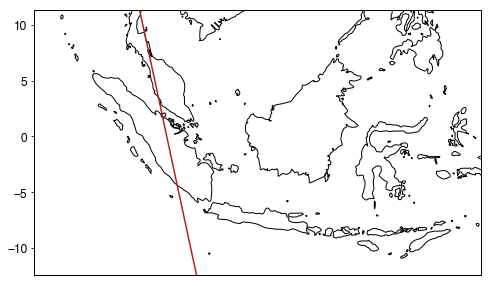

In [272]:
lat = ds['Latitude'].sel(fakeDim3=0).values
lon = ds['Longitude'].sel(fakeDim5=0).values


#####
fontsize=12
map_proj = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection=map_proj)
ax.set_extent([90,130,-12,11])
#ax.set_extent([50,180,-70,70])
ax.coastlines(resolution='50m')

ax.plot(lon,lat,c='firebrick')

ax.set_yticks([-10,-5,0,5,10])
ax.tick_params(labelsize=fontsize)

In [273]:
surface_elevation = ds['Surface_Elevation_Statistics'].values
ds['Surface_Elevation_Statistics']

<xarray.DataArray 'Surface_Elevation_Statistics' (fakeDim54: 4208, fakeDim55: 4)>
array([[0.      , 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , 0.      ],
       ...,
       [0.244   , 0.252   , 0.247   , 0.002129],
       [0.247   , 0.269   , 0.257467, 0.007544],
       [0.254   , 0.268   , 0.2586  , 0.004302]], dtype=float32)
Dimensions without coordinates: fakeDim54, fakeDim55
Attributes:
    units:        kilometers
    format:       Float_32
    valid_range:  -1.0...9.0
    fillvalue:    -9999.0

    30 km to -0.5

    20km to -0.5 km:  60m vertical resolution
    >20km:  180m

In [274]:
altitude_values =  numpy.arange

In [275]:
ds

<xarray.Dataset>
Dimensions:                                                       (fakeDim0: 4208, fakeDim1: 2, fakeDim10: 4208, fakeDim100: 1, fakeDim101: 4208, fakeDim102: 1, fakeDim103: 4208, fakeDim104: 1, fakeDim105: 4208, fakeDim106: 1, fakeDim107: 4208, fakeDim108: 1, fakeDim109: 4208, fakeDim11: 1, fakeDim110: 1, fakeDim111: 4208, fakeDim112: 1, fakeDim113: 4208, fakeDim114: 1, fakeDim115: 4208, fakeDim116: 1, fakeDim117: 4208, fakeDim118: 1, fakeDim119: 4208, fakeDim12: 4208, fakeDim120: 1, fakeDim121: 4208, fakeDim122: 1, fakeDim123: 4208, fakeDim124: 1, fakeDim125: 4208, fakeDim126: 1, fakeDim127: 4208, fakeDim128: 1, fakeDim129: 4208, fakeDim13: 1, fakeDim130: 1, fakeDim131: 4208, fakeDim132: 1, fakeDim133: 4208, fakeDim134: 1, fakeDim135: 4208, fakeDim136: 1, fakeDim137: 4208, fakeDim138: 1, fakeDim139: 4208, fakeDim14: 4208, fakeDim140: 1, fakeDim141: 4208, fakeDim142: 1, fakeDim15: 1, fakeDim16: 4208, fakeDim17: 1, fakeDim18: 4208, fakeDim19: 1, fakeDim2: 4208, fakeDim2

In [276]:
#cod_data = ds['Column_Optical_Depth_Cloud_532'].values
#ec_data = ds['Extinction_Coefficient_532'].values
#rh_data = ds['Relative_Humidity'].values
p_data = ds['Pressure'].values
#igbp_data = ds['IGBP_Surface_Type'].values
#clf_data = ds['Cloud_Layer_Fraction'].values
#avd_data = ds['Atmospheric_Volume_Description'].values
#tbc_data = ds['Total_Backscatter_Coefficient_532'].values
#ciab_data = ds['Column_Integrated_Attenuated_Backscatter_532'].values
#iwc_data = ds['Ice_Water_Content_Profile'].values

### trying to create cmap from these values

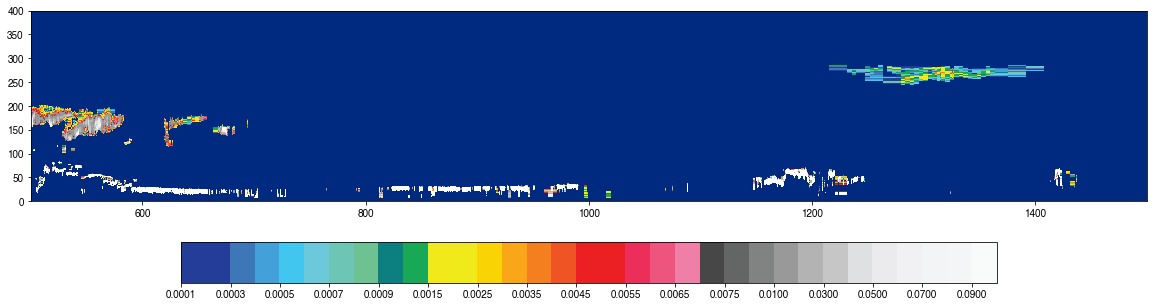

In [278]:
fig = mp.figure(figsize=(20,5))
ax = fig.add_subplot(111)
plot = ax.pcolormesh(gdal_tbc_data.T[::-1,:], norm=norm, vmin=0, vmax=0.1, cmap=calipso_colormap)
#plot = ax.imshow(gdal_tbc_data.T, norm=norm, cmap=calipso_colormap)

mp.xlim(500,1500)

cbar = mp.colorbar(plot, norm=norm, orientation='horizontal')
cbar.set_ticks(bounds[::2])

fig.savefig('hello.png')

In [279]:
lat_2d = numpy.repeat(lat, p_data.shape[1]).reshape((p_data.shape))

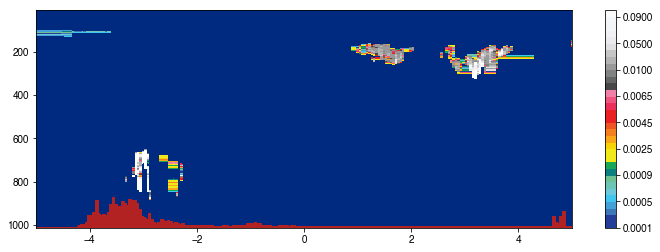

In [280]:
fig = mp.figure(figsize=(12,4))

ax = fig.add_subplot(111)
plot = ax.pcolormesh(lat_2d.T[::-1,:], p_data.T[::-1,:], \
                     gdal_tbc_data.T[::-1,:], norm=norm, cmap=calipso_colormap)

ax.set_facecolor('firebrick')
ax.set_ylim(1013.25,10)
ax.set_xlim(-5,5)
fig.colorbar(plot)